# Link prediction

In [97]:
%pip install networkx
%pip install node2vec

DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.
DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.


Number of nodes : 34
Number of edges : 78
Number of connected components : 1


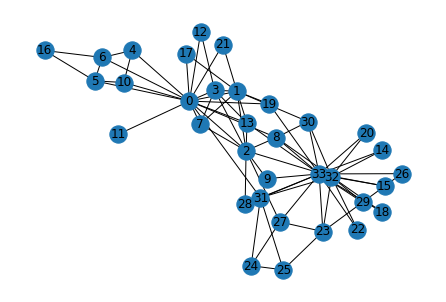

In [50]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt

n=34
m = 78
G_karate = nx.karate_club_graph()

pos = nx.spring_layout(G_karate)
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

n = G_karate.number_of_nodes()
m = G_karate.number_of_edges()
print("Number of nodes : %d" % n)
print("Number of edges : %d" % m)
print("Number of connected components : %d" % nx.number_connected_components(G_karate))



In [51]:
# Remove 20% das arestas
proportion_edges = 0.2
edge_subset = random.sample(G_karate.edges(), int(proportion_edges * G_karate.number_of_edges()))

# Cria uma cópia do grafo e remove arestas
G_karate_train = G_karate.copy()
G_karate_train.remove_edges_from(edge_subset)

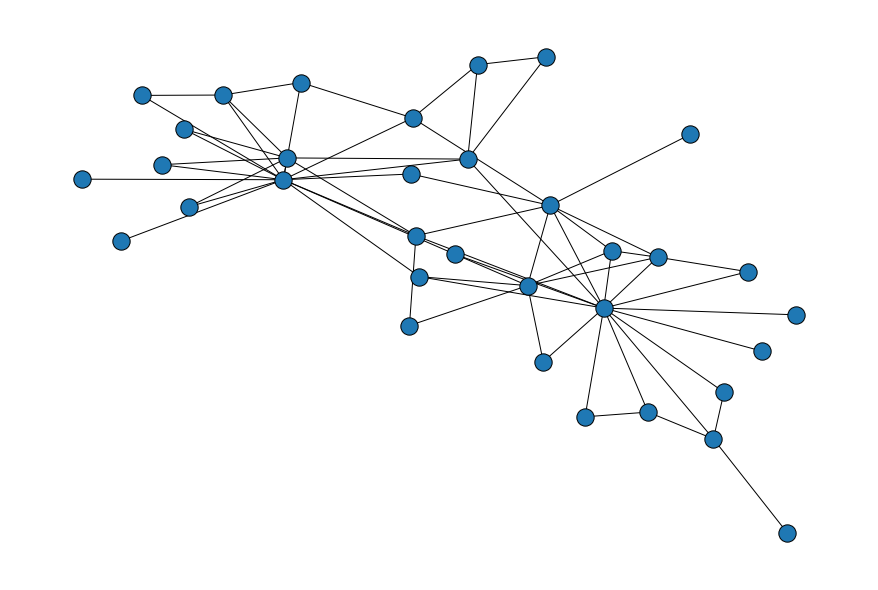

In [52]:
plt.figure(figsize=(12,8))
nx.draw(G_karate_train)
plt.gca().collections[0].set_edgecolor("#000000") 


In [53]:
edge_subset_size = len(list(edge_subset))
print("Numero de arestas deletadas : %d" % edge_subset_size)
print("Numero de arestas restantes : %d" % (m - edge_subset_size))

Numero de arestas deletadas : 15
Numero de arestas restantes : 63


## Jaccard coefficient

0.6052449965493445


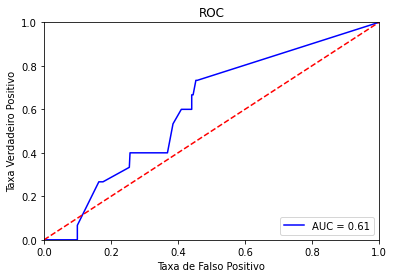

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

# Fazendo previsões com o jaccard
pred_jaccard = list(nx.jaccard_coefficient(G_karate_train))


score_jaccard = [s for (u,v,s) in pred_jaccard]
label_jaccard = [(u,v) in edge_subset for (u,v,s) in pred_jaccard]


# Computa o AUC score da curva ROC
fpr_jaccard, tpr_jaccard, _ = metrics.roc_curve(label_jaccard, score_jaccard)
auc_jaccard = roc_auc_score(label_jaccard, score_jaccard)
print(auc_jaccard)

import matplotlib.pyplot as plt
plt.title('ROC')
plt.plot(fpr_jaccard, tpr_jaccard, 'b', label = 'AUC = %0.2f' % auc_jaccard)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()


## Preferential Attachment

0.5937888198757764


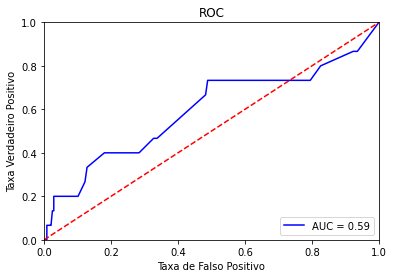

In [6]:
pred_prefAtch = list(nx.preferential_attachment(G_karate_train))

score_prefAtch = [s for (u,v,s) in pred_prefAtch]

label_prefAtch = [(u,v) in edge_subset for (u,v,s) in pred_prefAtch]

# Computa o AUC score da curva ROC
fpr_prefAtch, tpr_prefAtch, _ = metrics.roc_curve(label_prefAtch, score_prefAtch)
auc_prefAtch = roc_auc_score(label_prefAtch, score_prefAtch)
print(auc_prefAtch)

import matplotlib.pyplot as plt
plt.title('ROC')
plt.plot(fpr_prefAtch, tpr_prefAtch, 'b', label = 'AUC = %0.2f' % auc_prefAtch)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()

## Resource Allocation

0.7083505866114563


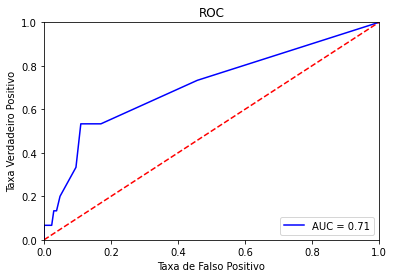

In [57]:
pred_ra = list(nx.resource_allocation_index(G_karate_train))

score_ra = [s for (u,v,s) in pred_ra]

label_ra = [(u,v) in edge_subset for (u,v,s) in pred_ra]

# Computa o AUC score da curva ROC
fpr_ra, tpr_ra, _ = metrics.roc_curve(label_ra, score_ra)
auc_ra = roc_auc_score(label_ra, score_ra)
print(auc_ra)

import matplotlib.pyplot as plt
plt.title('ROC')
plt.plot(fpr_ra, tpr_ra, 'b', label = 'AUC = %0.2f' % auc_ra)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()



## Common Neighbor Centrality

In [48]:
## Esta implementação depende do Networkx 2.6 que roda somente no python 3.7. Nesta máquina está com python 3.5

pred_CNC = list(nx.common_neighbor_centrality(G_karate_train))

score_CNC = [s for (u,v,s) in pred_CNC]

label_CNC= [(u,v) in edge_subset for (u,v,s) in pred_CNC]


fpr_CNC, tpr_CNC, _ = metrics.roc_curve(label_CNC, score_CNC)
auc_CNC = roc_auc_score(label_CNC, score_CNC)
print(auc_adamic)

import matplotlib.pyplot as plt
plt.title('ROC')
plt.plot(fpr_CNC, tpr_CNC, 'b', label = 'AUC = %0.2f' % auc_CNC)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()

AttributeError: module 'networkx' has no attribute 'common_neighbor_centrality'

## Adamic-Adar

0.7014492753623189


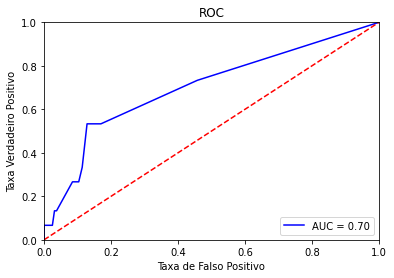

In [58]:
pred_adamic = list(nx.adamic_adar_index(G_karate_train))

score_adamic = [s for (u,v,s) in pred_adamic]

label_adamic = [(u,v) in edge_subset for (u,v,s) in pred_adamic]

fpr_adamic, tpr_adamic, _ = metrics.roc_curve(label_adamic, score_adamic)
auc_adamic = roc_auc_score(label_adamic, score_adamic)
print(auc_adamic)

import matplotlib.pyplot as plt
plt.title('ROC')
plt.plot(fpr_adamic, tpr_adamic, 'b', label = 'AUC = %0.2f' % auc_adamic)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()

### Todas as ROC

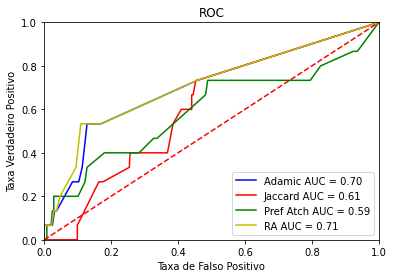

In [59]:
import matplotlib.pyplot as plt
plt.title('ROC')
plt.plot(fpr_adamic, tpr_adamic, 'b', label = 'Adamic AUC = %0.2f' % auc_adamic)
plt.plot(fpr_jaccard, tpr_jaccard, 'r', label = 'Jaccard AUC = %0.2f' % auc_jaccard)
plt.plot(fpr_prefAtch, tpr_prefAtch, 'g', label = 'Pref Atch AUC = %0.2f' % auc_prefAtch)
plt.plot(fpr_ra, tpr_ra, 'y', label = 'RA AUC = %0.2f' % auc_ra)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa de Falso Positivo')
plt.show()

# Predição de links do da rede do Facebook

In [10]:
import pandas as pd
import numpy as np
import random
import networkx as nx
import re
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

G_facebook = nx.read_edgelist("facebook_combined.txt",create_using = nx.Graph(), nodetype = int)
print(nx.info(G_facebook))

Graph with 4039 nodes and 88234 edges


In [11]:
A = nx.adjacency_matrix(G_facebook)
A.shape

(4039, 4039)

### Pegar todas as possibilidades de pares não conectados

In [12]:
# para guardar todos os pares de nós não conectados 
listUnconnected = []

# Varre a matriz de adjacência procurando por pares desconectados
offset = 0
for i in tqdm(range(A.shape[0])):
    for j in range(offset,A.shape[1]):
        if i != j:
            if A[i,j] == 0:
                listUnconnected.append([i,j])

    offset +=1

100%|██████████| 4039/4039 [02:26<00:00, 27.58it/s] 


In [13]:
unlinked1 = [i[0] for i in listUnconnected]
unlinked2 = [i[1] for i in listUnconnected]

dfPairs = pd.DataFrame({'node1':unlinked1, 
                     'node2':unlinked2})

# cria a variável 'link', onde 0= sem link e 1 com link
dfPairs['link'] = 0
dfPairs

,node1,node2,link
0,0,348,0
1,0,349,0
2,0,350,0
3,0,351,0
4,0,352,0
...,...,...,...
8066502,4035,4037,0
8066503,4035,4038,0
8066504,4036,4037,0
8066505,4036,4038,0


### Removendo arestas do grafo original

In [14]:
prop = 0.2
edge_subset = random.sample(G_facebook.edges(), int(prop * G_facebook.number_of_edges()))

# Cria uma cópia do grafo e remove arestas
G_facebook_train = G_facebook.copy()
G_facebook_train.remove_edges_from(edge_subset)


In [15]:
df = pd.DataFrame(edge_subset, columns=['node1', 'node2'])
df['link'] = 1

dfPairs = dfPairs.append(df)
dfPairs

,node1,node2,link
0,0,348,0
1,0,349,0
2,0,350,0
3,0,351,0
4,0,352,0
...,...,...,...
17641,2032,2643,1
17642,2054,2465,1
17643,2670,3283,1
17644,1275,1299,1


### Node embeddings com o node2vec

In [16]:
from node2vec import Node2Vec

# Gera caminhos 
node2vec = Node2Vec(G_facebook_train, dimensions=100, walk_length=16, num_walks=50)

# treina o modelo node2vec
n2w_model = node2vec.fit(window=7, min_count=1)

Computing transition probabilities:   0%|          | 0/4039 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:25<00:00,  1.93it/s]


In [24]:
featuresPares = [(n2w_model.wv[str(i)]+n2w_model.wv[str(j)]) for i,j in zip(dfPairs['node1'], dfPairs['node2'])]

### Separação dos dados para treino e teste

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(np.array(featuresPares), dfPairs['link'], 
                                                test_size = 0.3, 
                                                random_state = 10)

### Teste com uma regressão logística

In [26]:
lr = LogisticRegression(class_weight="balanced")

lr.fit(xtrain, ytrain)

LogisticRegression(class_weight='balanced')

### Fazendo predições

In [27]:
predictions = lr.predict_proba(xtest)

### AUC

In [28]:
roc_auc_score(ytest, predictions[:,1])

0.7535709562599318

### Acurácia e F1-score

In [48]:
from sklearn.metrics import f1_score, accuracy_score

predicao = (predictions[:,1]>=.5).astype(int)

print(accuracy_score(ytest, previsao))
print(f1_score(ytest, previsao))

0.6915356215410725
0.009731896316651974


In [ ]:
## Testem o desempenho com LightGBM